# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Operações Pontuais

### Download das imagens de teste

In [17]:
!wget 'https://homepages.cae.wisc.edu/~ece533/images/peppers.png'
!wget 'https://homepages.cae.wisc.edu/~ece533/images/baboon.png'

--2021-04-04 21:36:18--  https://homepages.cae.wisc.edu/~ece533/images/peppers.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 538749 (526K) [image/png]
Saving to: ‘peppers.png.1’

peppers.png.1       100%[===================>] 526.12K  3.32MB/s    in 0.2s    

2021-04-04 21:36:19 (3.32 MB/s) - ‘peppers.png.1’ saved [538749/538749]

--2021-04-04 21:36:19--  https://homepages.cae.wisc.edu/~ece533/images/baboon.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png.1’

baboon.png.1        100%[===================>] 622.2

### Imports

In [18]:
import cv2 as cv
import matplotlib.pyplot as plt

### Code

In [19]:
img1 = cv.imread('peppers.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('baboon.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

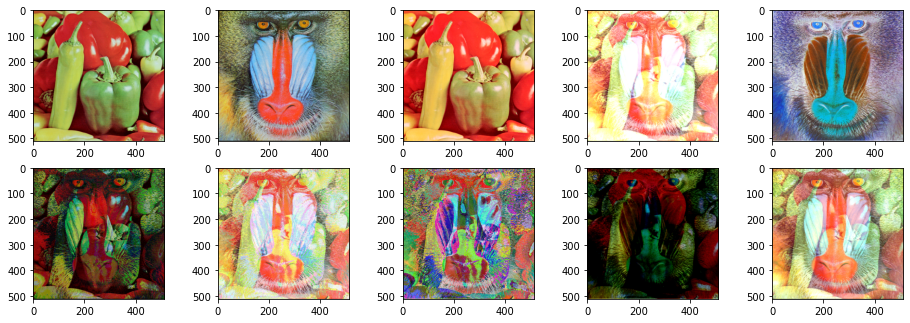

In [20]:
img3 = cv.add(img1, 60)
img4 = cv.add(img1, img2)
img5 = cv.bitwise_not(img2)
img6 = cv.bitwise_and(img1, img2)
img7 = cv.bitwise_or(img1, img2)
img8 = cv.bitwise_xor(img1, img2)
img9 = cv.subtract(img1, img2)
img10 = cv.addWeighted(img1, 0.60, img2, 0.80, 0)

plt.figure(figsize=(16, 14))
plt.subplot(551), plt.imshow(img1)
plt.subplot(552), plt.imshow(img2)
plt.subplot(553), plt.imshow(img3)
plt.subplot(554), plt.imshow(img4)
plt.subplot(555), plt.imshow(img5)
plt.subplot(556), plt.imshow(img6)
plt.subplot(557), plt.imshow(img7)
plt.subplot(558), plt.imshow(img8)
plt.subplot(559), plt.imshow(img9)
plt.subplot(5,5,10), plt.imshow(img10)

plt.show()

### Exercises

#### Imports

In [21]:
import numpy as np

#### Code

1. Utilizando a biblioteca OpenCV construa uma aplicação para:  
    - Carregar uma imagem digital  
    - Separar e apresentar os canais da imagem  

In [22]:
img_origin = cv.imread('peppers.png')
img_origin = cv.cvtColor(img_origin, cv.COLOR_BGR2RGB)

In [23]:
blue_channel, green_channel, red_channel = cv.split(img_origin)
zeros = np.zeros(img_origin.shape[:2], dtype = 'uint8')

In [24]:
red = cv.merge([red_channel, zeros, zeros])
green = cv.merge([zeros, green_channel, zeros])
blue = cv.merge([zeros, zeros, blue_channel])

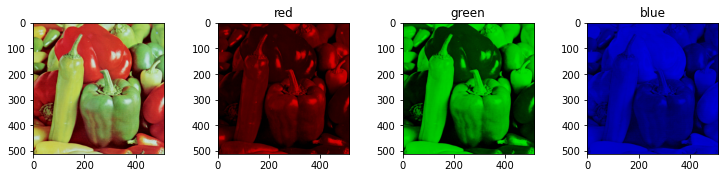

In [25]:
plt.figure(figsize=(16, 14))
plt.subplot(551), plt.imshow(img_origin)
plt.subplot(552), plt.imshow(red), plt.title('red')
plt.subplot(553), plt.imshow(green), plt.title('green')
plt.subplot(554), plt.imshow(blue), plt.title('blue')
plt.show()

2. Utilizando a biblioteca OpenCV construa uma aplicação para:  
    - Carregar uma imagem digital  
    - Transformar a imagem para tons de cinza utilizando operações pontuais.  
    - [Matplotlib Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [26]:
img_origin = cv.imread('peppers.png')
img_origin = cv.cvtColor(img_origin, cv.COLOR_BGR2RGB)

In [27]:
img_gray = cv.cvtColor(img_origin, cv.COLOR_RGB2GRAY)

In [28]:
# coverter RGB -> Gray manualmente
img_gray_manual = img_origin.copy()
img_gray_weighted = img_origin.copy()

for row in range(img_gray_manual.shape[0]):    # para todas as linhas
    for col in range(img_gray_manual.shape[1]):    # para todas as colunas
        r = img_gray_manual.item(row, col, 0)  # valor do pixel R
        g = img_gray_manual.item(row, col, 1)  # valor do pixel G
        b = img_gray_manual.item(row, col, 2)  # valor do pixel B
        gray = (r + g + b) / 3  # formula de conversao
        gray_weighted = (r * 0.30) + (g * 0.59) + (b * 0.11)  # formula de conversao ponderada

        # alterar os pixels da imagem
        img_gray_manual.itemset((row, col, 0), gray)
        img_gray_manual.itemset((row, col, 1), gray)
        img_gray_manual.itemset((row, col, 2), gray)

        img_gray_weighted.itemset((row, col, 0), gray_weighted)
        img_gray_weighted.itemset((row, col, 1), gray_weighted)
        img_gray_weighted.itemset((row, col, 2), gray_weighted)

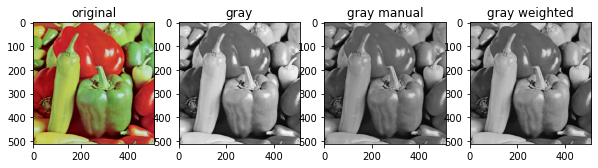

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_origin), plt.title('original')
plt.subplot(142), plt.imshow(img_gray, cmap='gray'), plt.title('gray')
plt.subplot(143), plt.imshow(img_gray_manual, cmap='gray'), plt.title('gray manual')
plt.subplot(144), plt.imshow(img_gray_weighted, cmap='gray'), plt.title('gray weighted')
plt.show()

3. Utilizando a biblioteca OpenCV construa uma aplicação para:  
    - Carregar uma imagem digital  
    - Transformar a imagem para preto e branco (binária) utilizando operações pontuais.  

In [30]:
img_bwb = img_gray.copy()

In [31]:
for row in range(img_gray.shape[0]):
    for col in range(img_gray.shape[1]):
        pixel = img_gray.item(row, col)
        if pixel > 127:
            img_bwb.itemset((row, col), 255)
        else:
            img_bwb.itemset((row, col), 0)

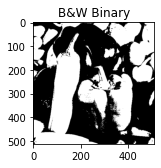

In [32]:
plt.figure(figsize=(10, 10))
plt.subplot(144), plt.imshow(img_bwb, cmap='gray'), plt.title('B&W Binary')
plt.show()